## EDA para datos de GOOGLE 

In [46]:
# Importamos las librerias necesarias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [4]:
# Carga el primer archivo CSV
Review = pd.read_csv('c:/DataScience/Proyecto_Final/dfreviewgoo3_csv.csv')

# Carga el segundo archivo CSV
Metadata = pd.read_csv('c:/DataScience/Proyecto_Final/florida_restaurants.csv')

# Muestra las primeras filas de cada DataFrame
print(Review.head())
print(Metadata.head())


   Unnamed: 0                user_id                 name  \
0         515  105941553219163737304      Douglas Gummere   
1         516  109857700811373231502         David Powell   
2         961  114383550862594326875         Rhona Barnum   
3        1262  101770467939555366215  Medardo A. Cevallos   
4        1766  108970660648595440498        Velma Malagon   

                  time  rating  \
0  2018-09-20 00:12:47       1   
1  2018-08-22 11:13:16       5   
2  2017-12-04 15:43:10       4   
3  2018-02-19 21:42:44       5   
4  2020-02-29 00:03:09       1   

                                                text  \
0  Love this place. Great little restaurant, with...   
1  A classy restaurant to match the charm of the ...   
2  Lovely restaurant with nice view of the town o...   
3  Highly recommended; great spot for locals and ...   
4  I had such  High hopes for a neighborhood barb...   

                                 gmap_id  year  
0  0x8894b5a7a7909725:0xe4687299fd288188  

In [6]:
print(Review.columns)
print(Metadata.columns)


Index(['Unnamed: 0', 'user_id', 'name', 'time', 'rating', 'text', 'gmap_id',
       'year'],
      dtype='object')
Index(['name', 'address', 'gmap_id', 'latitude', 'longitude', 'category',
       'avg_rating', 'num_of_reviews', 'hours', 'MISC', 'state',
       'relative_results', 'url', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday'],
      dtype='object')


Fusionar los DataFrames

In [14]:
# Fusionar los DataFrames en una sola tabla utilizando 'gmap_id'
combined_data = pd.merge(Review, Metadata, on='gmap_id', how='inner')

# Verificar el resultado de la fusión
combined_data.head()



,Unnamed: 0,user_id,name_x,time,rating,text,gmap_id,year,name_y,address,...,state,relative_results,url,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,515,105941553219163737304,Douglas Gummere,2018-09-20 00:12:47,1,"Love this place. Great little restaurant, with...",0x8894b5a7a7909725:0xe4687299fd288188,2018,gormley's on the river | modern cuisine in his...,gormley's on the river | modern cuisine in his...,...,Permanently closed,"['0x8894b5a649e1f5cb:0xe5ef826dc2f3842f', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,515,105941553219163737304,Douglas Gummere,2018-09-20 00:12:47,1,"Love this place. Great little restaurant, with...",0x8894b5a7a7909725:0xe4687299fd288188,2018,gormley's on the river | modern cuisine in his...,gormley's on the river | modern cuisine in his...,...,Permanently closed,"['0x8894b5a649e1f5cb:0xe5ef826dc2f3842f', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,516,109857700811373231502,David Powell,2018-08-22 11:13:16,5,A classy restaurant to match the charm of the ...,0x8894b5a7a7909725:0xe4687299fd288188,2018,gormley's on the river | modern cuisine in his...,gormley's on the river | modern cuisine in his...,...,Permanently closed,"['0x8894b5a649e1f5cb:0xe5ef826dc2f3842f', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,516,109857700811373231502,David Powell,2018-08-22 11:13:16,5,A classy restaurant to match the charm of the ...,0x8894b5a7a7909725:0xe4687299fd288188,2018,gormley's on the river | modern cuisine in his...,gormley's on the river | modern cuisine in his...,...,Permanently closed,"['0x8894b5a649e1f5cb:0xe5ef826dc2f3842f', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1262,101770467939555366215,Medardo A. Cevallos,2018-02-19 21:42:44,5,Highly recommended; great spot for locals and ...,0x88d900575f0dd065:0x9b3638d2a80be4d,2018,zampini's bottega,"zampini's bottega, 510 se 5th ave, fort lauder...",...,Permanently closed,NaN,https://www.google.com/maps/place//data=!4m2!3...,08:30:00-22:00:00,08:30:00-22:00:00,08:30:00-22:00:00,08:30:00-22:00:00,07:00:00-23:00:00,09:00:00-23:00:00,09:00:00-22:00:00


In [8]:
# Exportar el DataFrame combinado a un archivo CSV
combined_data.to_csv('combined_data.csv', index=False)

# Verificar que el archivo se haya creado
import os
print('combined_data.csv' in os.listdir())


True


### Limpieza de datos

In [9]:
# Eliminar duplicados
combined_data.drop_duplicates(inplace=True)

# Manejar valores nulos (ejemplo: rellenar con 'No hay información' o descartar)
combined_data.fillna('No hay información', inplace=True)

# Verificar los cambios
print(combined_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21828 entries, 0 to 21827
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        21828 non-null  int64  
 1   user_id           21828 non-null  object 
 2   name_x            21828 non-null  object 
 3   time              21828 non-null  object 
 4   rating            21828 non-null  int64  
 5   text              21828 non-null  object 
 6   gmap_id           21828 non-null  object 
 7   year              21828 non-null  int64  
 8   name_y            21828 non-null  object 
 9   address           21828 non-null  object 
 10  latitude          21828 non-null  float64
 11  longitude         21828 non-null  float64
 12  category          21828 non-null  object 
 13  avg_rating        21828 non-null  float64
 14  num_of_reviews    21828 non-null  int64  
 15  hours             21828 non-null  object 
 16  MISC              21828 non-null  object

#### tenemos dos columnas similares, veamos la información de cada una : name_x y name_y

In [15]:
# Verificar algunas entradas de name_x y name_y
print(combined_data[['name_x', 'name_y']].head(20))

# Verificar valores únicos en ambas columnas
print("Valores únicos en name_x:")
print(combined_data['name_x'].unique())

print("Valores únicos en name_y:")
print(combined_data['name_y'].unique())


                 name_x                                             name_y
0       Douglas Gummere  gormley's on the river | modern cuisine in his...
1       Douglas Gummere  gormley's on the river | modern cuisine in his...
2          David Powell  gormley's on the river | modern cuisine in his...
3          David Powell  gormley's on the river | modern cuisine in his...
4   Medardo A. Cevallos                                  zampini's bottega
5         Velma Malagon                         biscayne backyard barbecue
6         Hanan M'barki                   crab du jour cajun seafood & bar
7         Hanan M'barki                   crab du jour cajun seafood & bar
8         Hanan M'barki                   crab du jour cajun seafood & bar
9    Shona-Lee Thompson                               jk fast food & fruit
10   Shona-Lee Thompson                               jk fast food & fruit
11      Valentina Ruano                               jk fast food & fruit
12      Valentina Ruano  

#### De acuerdo con la informacion, name_x contiene los nombres de los usuarios y name_y contiene los nombres de los restaurantes.

#### Para el análisis de restaurantes de comida tipo americana, necesitamos centrarnos en los nombres de los restaurantes, por lo que podemos eliminar la columna name_x.

In [16]:
# Eliminar la columna 'name_x'
combined_data.drop(columns=['name_x'], inplace=True)

# Renombrar la columna 'name_y' a 'restaurant_name'
combined_data.rename(columns={'name_y': 'restaurant_name'}, inplace=True)

# Verificar el resultado
print(combined_data.head())
print(combined_data.columns)


   Unnamed: 0                user_id                 time  rating  \
0         515  105941553219163737304  2018-09-20 00:12:47       1   
1         515  105941553219163737304  2018-09-20 00:12:47       1   
2         516  109857700811373231502  2018-08-22 11:13:16       5   
3         516  109857700811373231502  2018-08-22 11:13:16       5   
4        1262  101770467939555366215  2018-02-19 21:42:44       5   

                                                text  \
0  Love this place. Great little restaurant, with...   
1  Love this place. Great little restaurant, with...   
2  A classy restaurant to match the charm of the ...   
3  A classy restaurant to match the charm of the ...   
4  Highly recommended; great spot for locals and ...   

                                 gmap_id  year  \
0  0x8894b5a7a7909725:0xe4687299fd288188  2018   
1  0x8894b5a7a7909725:0xe4687299fd288188  2018   
2  0x8894b5a7a7909725:0xe4687299fd288188  2018   
3  0x8894b5a7a7909725:0xe4687299fd288188  2018  

Para hacer un análisis enfocado en restaurantes de comida tipo americana, simplifiquemos los datos eliminando las columnas menos relevantes para este objetivo.

'Unnamed: 0': Un índice innecesario que no aporta valor analítico.

'relative_results': Información de resultados relacionados que no es crucial para el análisis.

'MISC': Detalles variados que pueden no ser relevantes para el análisis general de restaurantes de comida americana.

'state': tenemos esta informacion por los dias de la semana.

'url': No es necesario para el análisis de datos.


In [18]:
# Eliminar columnas innecesarias
columns_to_drop = ['Unnamed: 0', 'relative_results', 'MISC', 'state', 'url']
combined_data_cleaned = combined_data.drop(columns=columns_to_drop)

# Verificar el resultado de la limpieza
print(combined_data_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21828 entries, 0 to 21827
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          21828 non-null  object 
 1   time             21828 non-null  object 
 2   rating           21828 non-null  int64  
 3   text             21828 non-null  object 
 4   gmap_id          21828 non-null  object 
 5   year             21828 non-null  int64  
 6   restaurant_name  21828 non-null  object 
 7   address          21828 non-null  object 
 8   latitude         21828 non-null  float64
 9   longitude        21828 non-null  float64
 10  category         21828 non-null  object 
 11  avg_rating       21828 non-null  float64
 12  num_of_reviews   21828 non-null  int64  
 13  hours            21828 non-null  object 
 14  Monday           15621 non-null  object 
 15  Tuesday          16431 non-null  object 
 16  Wednesday        17456 non-null  object 
 17  Thursday    

Concentrémonos en realizar un Análisis Exploratorio de Datos (EDA) enfocado en los restaurantes de comida tipo americana

In [49]:
combined_data_cleaned.head(3)

,user_id,time,rating,text,gmap_id,year,restaurant_name,address,latitude,longitude,...,num_of_reviews,hours,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,city
0,105941553219163737304,2018-09-20 00:12:47,1,"Love this place. Great little restaurant, with...",0x8894b5a7a7909725:0xe4687299fd288188,2018,gormley's on the river | modern cuisine in his...,gormley's on the river | modern cuisine in his...,29.726949,-84.981535,...,17,"{'Monday': None, 'Tuesday': None, 'Wednesday':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,apalachicola
1,105941553219163737304,2018-09-20 00:12:47,1,"Love this place. Great little restaurant, with...",0x8894b5a7a7909725:0xe4687299fd288188,2018,gormley's on the river | modern cuisine in his...,gormley's on the river | modern cuisine in his...,29.726949,-84.981535,...,17,"{'Monday': None, 'Tuesday': None, 'Wednesday':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,apalachicola
2,109857700811373231502,2018-08-22 11:13:16,5,A classy restaurant to match the charm of the ...,0x8894b5a7a7909725:0xe4687299fd288188,2018,gormley's on the river | modern cuisine in his...,gormley's on the river | modern cuisine in his...,29.726949,-84.981535,...,17,"{'Monday': None, 'Tuesday': None, 'Wednesday':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,apalachicola


#### Filtro de Restaurantes de Comida Americana

In [21]:
american_restaurants = combined_data_cleaned[combined_data_cleaned['category'].str.contains('American', case=False, na=False)]

Descripción Básica y Distribución

In [32]:
# Descripción estadística de los datos numéricos
print(combined_data_cleaned.describe())


             rating          year      latitude     longitude    avg_rating  \
count  21828.000000  21828.000000  21828.000000  21828.000000  21828.000000   
mean       4.221230   2019.209914     27.967616    -81.835466      4.401576   
std        1.256361      1.132173      1.460901      1.681176      0.248166   
min        1.000000   2017.000000     24.547407    -87.333840      1.700000   
25%        4.000000   2018.000000     26.713230    -82.500338      4.300000   
50%        5.000000   2019.000000     28.027953    -81.495227      4.400000   
75%        5.000000   2020.000000     28.613125    -80.443045      4.600000   
max        5.000000   2021.000000     30.944592    -80.036594      5.000000   

       num_of_reviews  
count    21828.000000  
mean      1536.013286  
std       1756.703858  
min          8.000000  
25%        298.000000  
50%        938.000000  
75%       2127.000000  
max       8116.000000  


Cantidad por Ciudad:

In [33]:
# Muestra las primeras 5 filas de la columna 'address'
combined_data_cleaned['address'].head()


0    gormley's on the river | modern cuisine in his...
1    gormley's on the river | modern cuisine in his...
2    gormley's on the river | modern cuisine in his...
3    gormley's on the river | modern cuisine in his...
4    zampini's bottega, 510 se 5th ave, fort lauder...
Name: address, dtype: object

In [34]:
# Extraer la ciudad desde la columna 'address' utilizando una expresión regular
# Busca el texto antes de la abreviatura del estado (de dos letras)
combined_data_cleaned['city'] = combined_data_cleaned['address'].str.extract(r',\s([^,]+),\s\w{2}\s\d{5}$')

# Revisa los primeros valores para asegurarte de que la extracción es correcta
print(combined_data_cleaned[['address', 'city']].head())


                                             address             city
0  gormley's on the river | modern cuisine in his...     apalachicola
1  gormley's on the river | modern cuisine in his...     apalachicola
2  gormley's on the river | modern cuisine in his...     apalachicola
3  gormley's on the river | modern cuisine in his...     apalachicola
4  zampini's bottega, 510 se 5th ave, fort lauder...  fort lauderdale


Distribución de Restaurantes en Florida

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14932\1673893069.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_distribution.index, y=city_distribution.values, palette=colors)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_14932\1673893069.py:14: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=city_distribution.index, y=city_distribution.values, palette=colors)


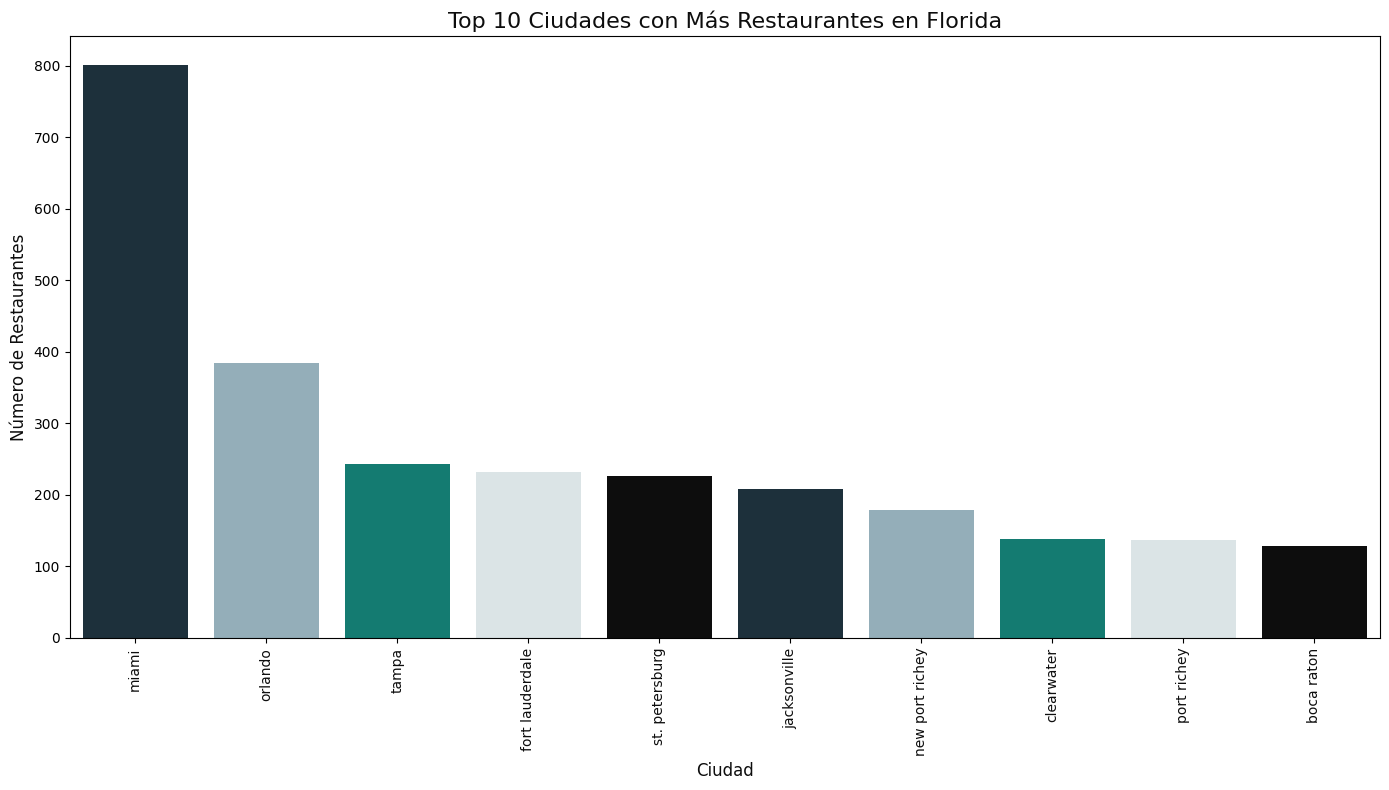

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que tienes una columna 'city' que extrae solo los nombres de las ciudades
city_distribution = combined_data_cleaned['city'].value_counts().head(10)

# Ajusta el tamaño del gráfico para que sea más ancho y legible
plt.figure(figsize=(14, 8))

# Colores personalizados sin #F0F2F2
colors = ['#183140', '#8EB1BF', '#038C7F', '#D9E5E8', '#0D0D0D']

# Gráfico de barras con los colores personalizados
sns.barplot(x=city_distribution.index, y=city_distribution.values, palette=colors)

# Título mejorado
plt.title('Top 10 Ciudades con Más Restaurantes en Florida', fontsize=16, color='#0D0D0D')

# Cambia las etiquetas para mayor legibilidad
plt.xlabel('Ciudad', fontsize=12, color='#0D0D0D')
plt.ylabel('Número de Restaurantes', fontsize=12, color='#0D0D0D')

# Rota las etiquetas de las ciudades para que sean más fáciles de leer (90 grados)
plt.xticks(rotation=90, fontsize=10, color='#0D0D0D')

# Muestra el gráfico
plt.tight_layout()
plt.show()


#### Distribucion de restaurantes tipo Americano en Florida

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14932\306061648.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_distribution.index, y=city_distribution.values, palette=colors)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_14932\306061648.py:17: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=city_distribution.index, y=city_distribution.values, palette=colors)


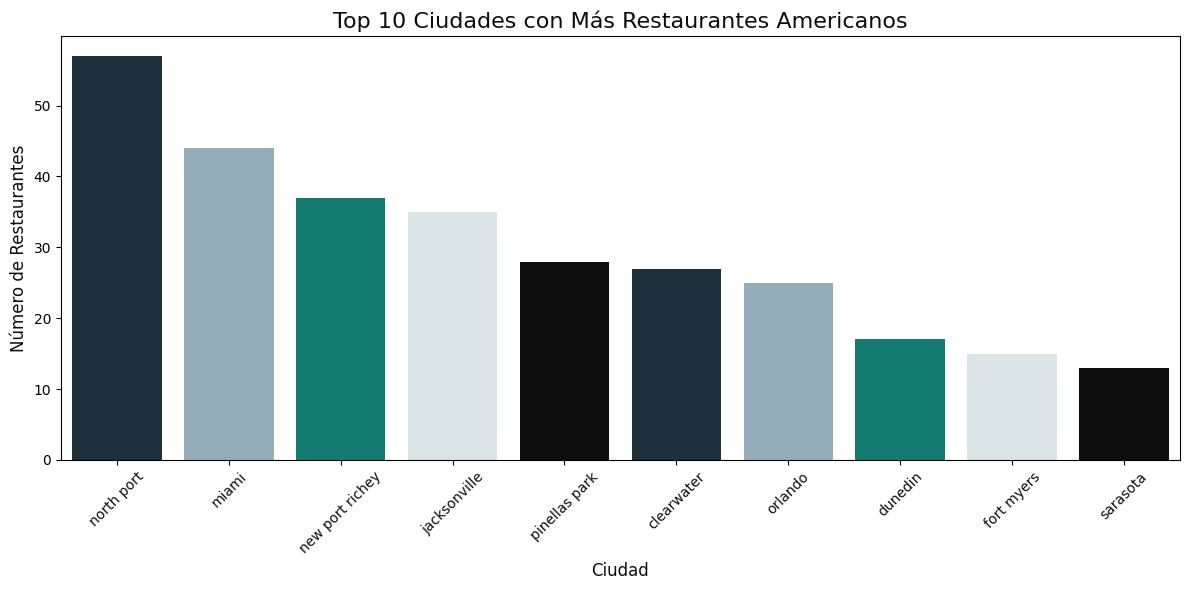

In [66]:
# Filtra los restaurantes de categoría "American"
american_restaurants = combined_data_cleaned[combined_data_cleaned['category'].str.contains('American', case=False, na=False)]

# Obtén la distribución de restaurantes por ciudad (top 10 ciudades)
city_distribution = american_restaurants['city'].value_counts().head(10)

# Crear la visualización
plt.figure(figsize=(12, 6))

# Colores personalizados
colors = ['#183140', '#8EB1BF', '#038C7F', '#D9E5E8', '#0D0D0D']

# Gráfico de barras con los colores personalizados
sns.barplot(x=city_distribution.index, y=city_distribution.values, palette=colors)

# Añadir títulos y etiquetas
plt.title('Top 10 Ciudades con Más Restaurantes Americanos', fontsize=16, color='#0D0D0D')
plt.xlabel('Ciudad', fontsize=12, color='#0D0D0D')
plt.ylabel('Número de Restaurantes', fontsize=12, color='#0D0D0D')

# Rotar etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45, fontsize=10, color='#0D0D0D')

# Mostrar el gráfico
plt.tight_layout()
plt.show()



#### De acuerdo con la informacion optenida veamos cual es % de restaurentes tipo americano por ciudad

In [65]:
# Calcular el total de restaurantes por ciudad
total_restaurants_per_city = combined_data_cleaned['city'].value_counts()

# Calcular el total de restaurantes tipo americano por ciudad
american_restaurants = combined_data_cleaned[combined_data_cleaned['category'].str.contains('American', case=False, na=False)]
american_restaurants_per_city = american_restaurants['city'].value_counts()

# Calcular el promedio
average_total_restaurants = total_restaurants_per_city.mean()
average_american_restaurants = american_restaurants_per_city.mean()

# Imprimir resultados
print(f'Promedio de restaurantes por ciudad: {average_total_restaurants:.2f}')
print(f'Promedio de restaurantes americanos por ciudad: {average_american_restaurants:.2f}')


Promedio de restaurantes por ciudad: 25.74
Promedio de restaurantes americanos por ciudad: 7.83


In [69]:
Porcen_derestaurate_americano_por_ciudad= (average_american_restaurants/ average_total_restaurants) * 100
print(Porcen_derestaurate_americano_por_ciudad)

30.400986644596983


En pormedio el 30,4% de los restaurentes de cada ciudad en florida son restaurantes tipo americano.

Calificaciones y Reseñas

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14932\1262125860.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")


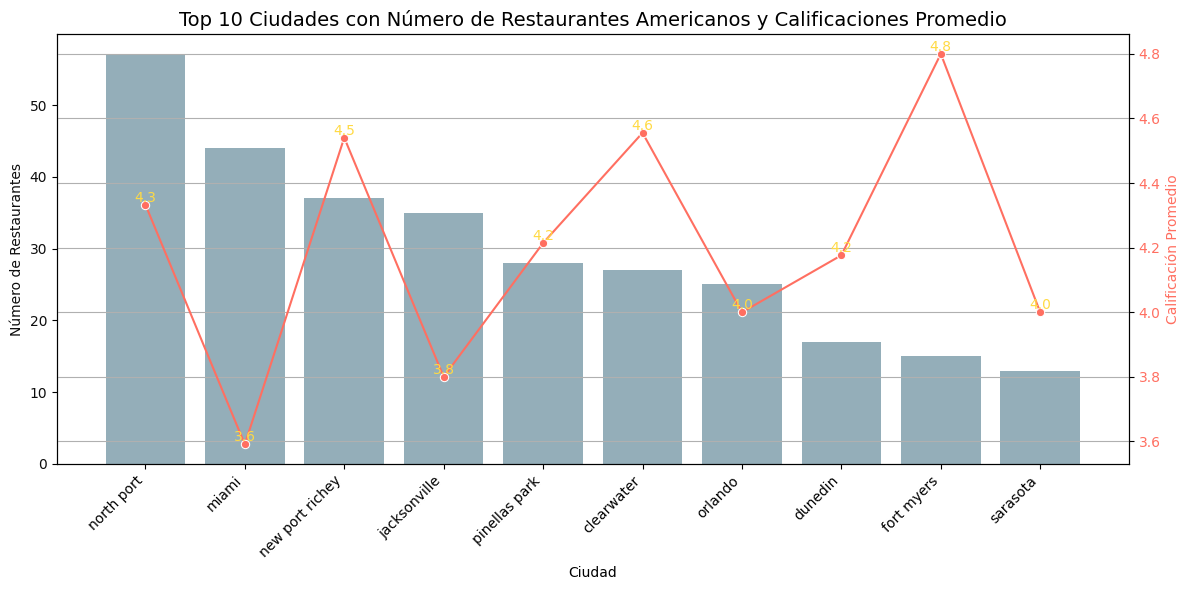

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtra los restaurantes de categoría "American"
american_restaurants = combined_data_cleaned[combined_data_cleaned['category'].str.contains('American', case=False, na=False)]

# Obtén la distribución de restaurantes por ciudad (top 10 ciudades)
top_10_cities = american_restaurants['city'].value_counts().head(10)

# Filtra los restaurantes de esas top 10 ciudades
top_city_restaurants = american_restaurants[american_restaurants['city'].isin(top_10_cities.index)]

# Calcula la calificación promedio por ciudad
average_ratings = top_city_restaurants.groupby('city')['rating'].mean()

# Crear la visualización
fig, ax1 = plt.subplots(figsize=(12, 6))

# Colores para las gráficas
bar_color = '#8EB1BF'  # Color de las barras
line_color = '#FF6F61'  # Color para la línea de calificaciones promedio
text_color = '#FFDA44'  # Color para las etiquetas de calificación promedio

# Gráfico de número de restaurantes
ax1.set_xlabel('Ciudad')
ax1.set_ylabel('Número de Restaurantes', color='#0D0D0D')  # Color para el eje Y de número de restaurantes
sns.barplot(x=top_10_cities.index, y=top_10_cities.values, color=bar_color, ax=ax1)  # Color de las barras
ax1.tick_params(axis='y', labelcolor='#0D0D0D')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")

# Crear un segundo eje Y
ax2 = ax1.twinx()
ax2.set_ylabel('Calificación Promedio', color=line_color)  # Color para el eje Y de calificación promedio
sns.lineplot(x=average_ratings.index, y=average_ratings.values, color=line_color, marker='o', ax=ax2)  # Color para la línea
ax2.tick_params(axis='y', labelcolor=line_color)

# Añadir etiquetas a los puntos de calificación promedio
for city, rating in average_ratings.items():
    ax2.text(city, rating, f'{rating:.1f}', color=text_color, ha='center', va='bottom', fontsize=10)  # Color para las etiquetas

# Ajustar estilo y título
plt.title('Top 10 Ciudades con Número de Restaurantes Americanos y Calificaciones Promedio', fontsize=14)
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


el gráfico revela un contraste entre el número de restaurantes y las calificaciones promedio, lo que sugiere que más no siempre es mejor. Las ciudades con menos restaurantes a menudo tienen mejores calificaciones, lo que podría ser un indicador de que los clientes valoran la calidad sobre la cantidad, y que los restaurantes en ciudades con más competencia podrían beneficiarse de centrarse en mejorar la experiencia del cliente para elevar sus calificaciones

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14932\1684362889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  american_restaurants['review_length'] = american_restaurants['text'].apply(len)


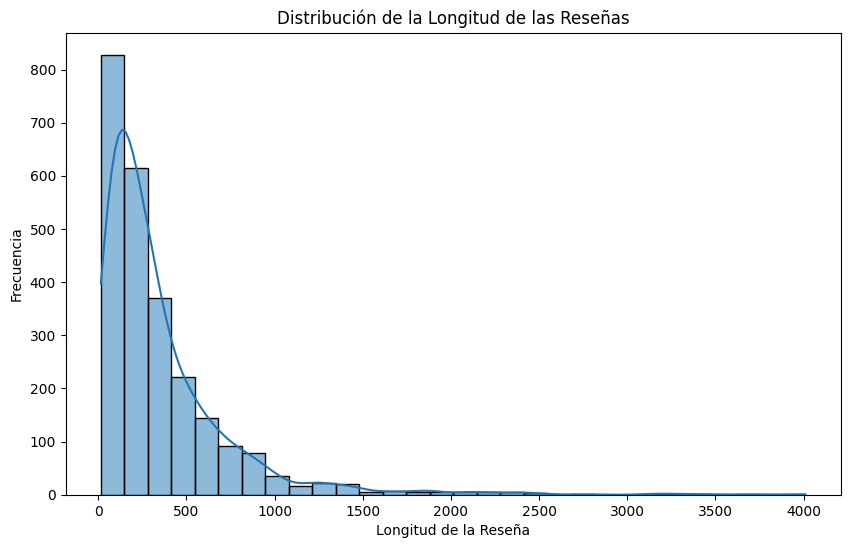

In [44]:
# Distribución de la longitud de las reseñas
american_restaurants['review_length'] = american_restaurants['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(american_restaurants['review_length'], bins=30, kde=True)
plt.title('Distribución de la Longitud de las Reseñas')
plt.xlabel('Longitud de la Reseña')
plt.ylabel('Frecuencia')
plt.show()


In [45]:
m = folium.Map(location=[27.9944024, -81.7602544], zoom_start=6)  # Centrado en Florida
HeatMap(american_restaurants[['latitude', 'longitude', 'avg_rating']].values, radius=15).add_to(m)
m.save('heatmap_american_restaurants.html')


Las áreas con colores más intensos representan zonas con mayor concentración de restaurantes con altas calificaciones.

Distribución restaurantes tipo americano abiertos por dias de la semana 

In [52]:
american_restaurants.head(1)

,user_id,time,rating,text,gmap_id,year,restaurant_name,address,latitude,longitude,...,hours,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,city,review_length
111,101566886337322188723,2021-06-04 19:32:55,5,(Translated by Google) Excellent service from ...,0x88d9c1f2ac59568b:0x7e92fe0dcd4a9311,2021,rinconcito miami #5 - kendall breeze,"rinconcito miami #5 - kendall breeze, 12700 sw...",25.648548,-80.399625,...,"{'Monday': '08:00:00-16:00:00', 'Tuesday': '08...",08:00:00-16:00:00,08:00:00-16:00:00,08:00:00-16:00:00,08:00:00-16:00:00,08:00:00-16:00:00,08:00:00-16:00:00,NaN,miami,408


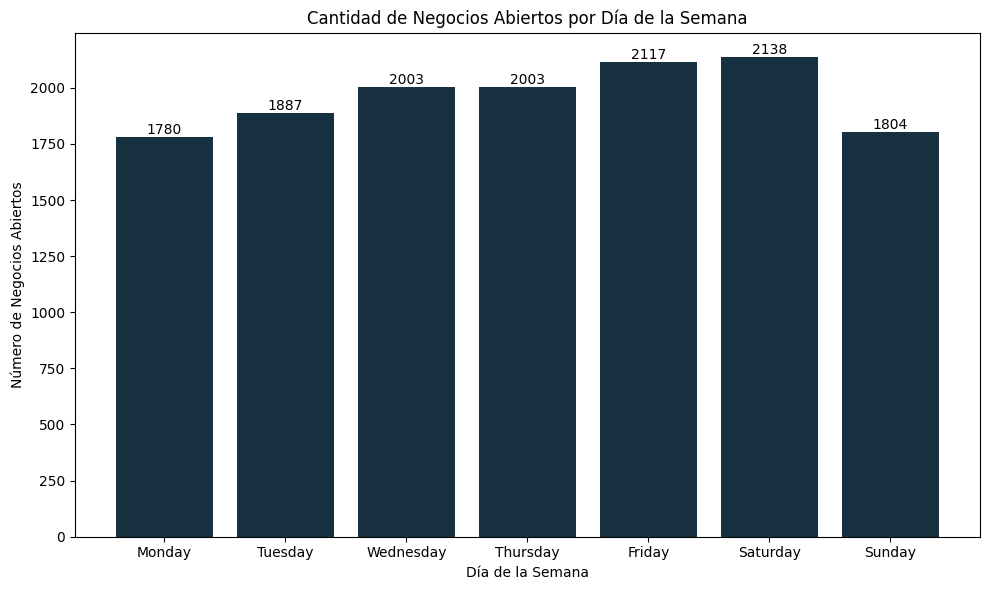

In [60]:
# Función para procesar la columna 'hours' y crear nuevas columnas por día
def process_hours(row, idx):
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    # Verificar si row es un diccionario
    if isinstance(row, str):
        try:
            hours_dict = eval(row)  # Convertir la cadena a un diccionario
        except Exception:
            return  # Si no se puede convertir, salir
    else:
        return  # Si no es válido, salir
    
    for day in days:
        if day in hours_dict and hours_dict[day] is not None:
            open_time, close_time = hours_dict[day].split('-')
            american_restaurants.loc[idx, f'{day}_open'] = open_time
            american_restaurants.loc[idx, f'{day}_close'] = close_time
        else:
            american_restaurants.loc[idx, f'{day}_open'] = np.nan
            american_restaurants.loc[idx, f'{day}_close'] = np.nan

# Aplicar la función a la columna 'hours'
for idx, row in american_restaurants['hours'].items():
    process_hours(row, idx)

# Contar cuántos negocios están abiertos al menos un día de la semana
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
open_counts = {day: american_restaurants[f'{day}_open'].notna().sum() for day in days}

# Crear un gráfico de barra
plt.figure(figsize=(10, 6))
plt.bar(open_counts.keys(), open_counts.values(), color='#183140')  # Cambiar el color a #183140

# Agregar etiquetas y título
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Negocios Abiertos')
plt.title('Cantidad de Negocios Abiertos por Día de la Semana')

# Mostrar la cantidad de negocios encima de cada barra
for day, count in open_counts.items():
    plt.text(day, count, str(count), ha='center', va='bottom')

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño
plt.show()


Se logra observar que hay mayor cantidad de restaurantes abiertos los viernes y sabados. y los lunes y domingo disminuyen notablemente

Distribucion por horario de apertura 

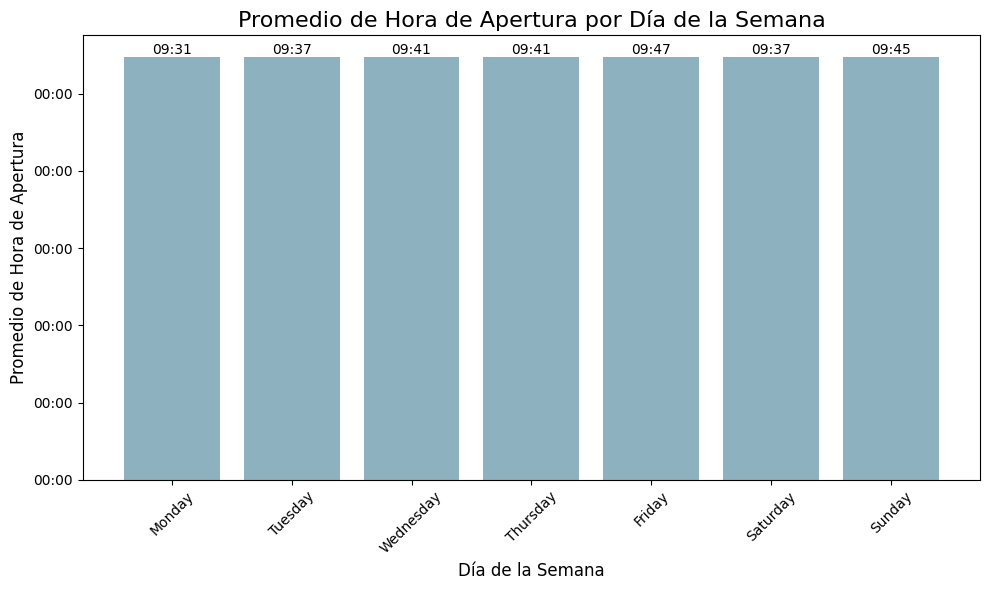

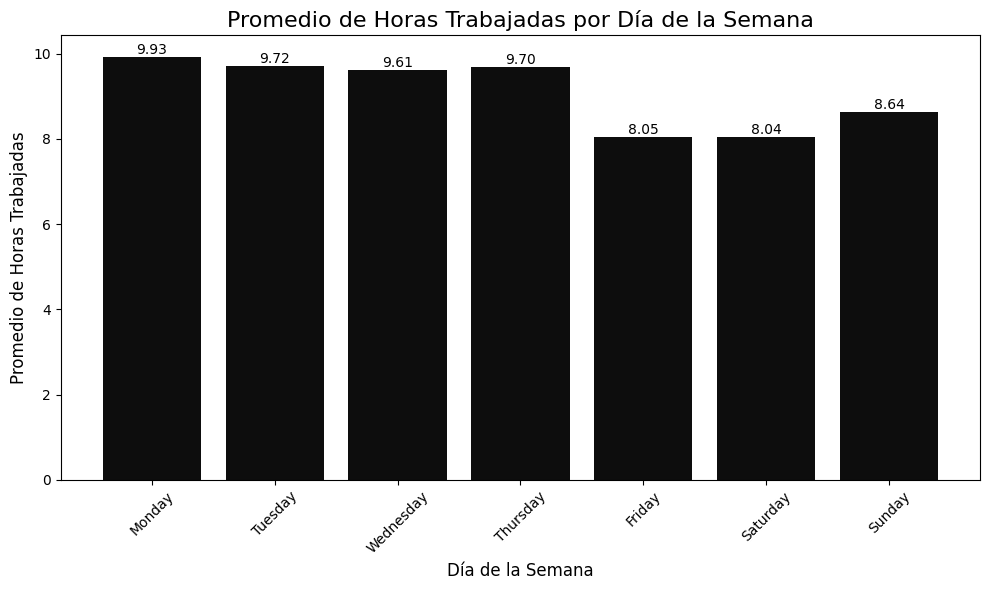

In [59]:
# Colores personalizados (dos colores)
colors = ['#8EB1BF', '#0D0D0D']  # Color para el gráfico de horarios de apertura y horas trabajadas

# ----- Gráfico 1: Promedio de horario de apertura -----
plt.figure(figsize=(10, 6))

# Convertir las horas promedio a números para graficar
open_hours = [pd.to_datetime(str(average_open_times[day])) for day in days]

# Graficar las horas de apertura
plt.bar(days, open_hours, color=colors[0])  # Utilizar el primer color

# Formato de hora (e.g., 09:30 AM)
formatter = mdates.DateFormatter('%H:%M')
plt.gca().yaxis.set_major_formatter(formatter)

# Rotar las etiquetas de los días para que se vean mejor
plt.xticks(rotation=45)

# Agregar etiquetas y título
plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Promedio de Hora de Apertura', fontsize=12)
plt.title('Promedio de Hora de Apertura por Día de la Semana', fontsize=16)

# Mostrar la hora promedio en formato "HH:MM" encima de cada barra
for i, (day, open_time) in enumerate(average_open_times.items()):
    plt.text(i, open_hours[i], f'{open_time.strftime("%H:%M")}', ha='center', va='bottom')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# ----- Gráfico 2: Promedio de horas trabajadas -----
plt.figure(figsize=(10, 6))
plt.bar(average_hours_worked.keys(), average_hours_worked.values(), color=colors[1])  # Utilizar el segundo color

# Agregar etiquetas y título
plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Promedio de Horas Trabajadas', fontsize=12)
plt.title('Promedio de Horas Trabajadas por Día de la Semana', fontsize=16)

# Mostrar el promedio de horas trabajadas encima de cada barra
for i, (day, hours) in enumerate(average_hours_worked.items()):
    plt.text(i, hours, f'{hours:.2f}', ha='center', va='bottom')

# Rotar las etiquetas de los días para que se vean mejor
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Los restaurantes tienen una hora de apertura muy similar entre ellos. Podriamos generalizar que en floridad de 9:30 a 9:45 am la mayoria de los restaurantes ya se encuentran abiertos.

Tambien podemos observar que los viernes y los sabados se trabajan en promedio 2 horas menos.